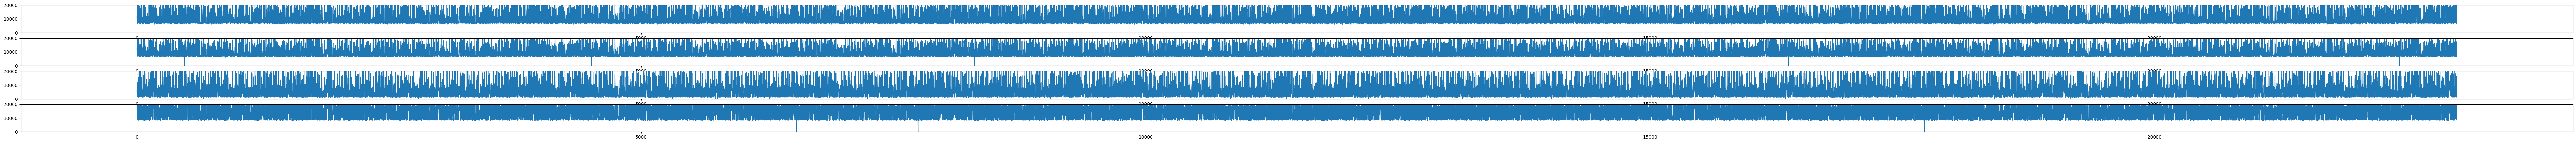

In [1]:
import h5py
import os
import sys
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from matplotlib.pyplot import figure
from sklearn.metrics.pairwise import cosine_similarity
    
# # for file in os.listdir(directory):
# #      filename = os.fsdecode(file)
# #      if filename.endswith(".mat"):
# #         print(file)
# #         # f = h5py.File(directory + str(filename), 'r')
# #         # print(f.keys())
# #         break
         

# # print(sys.prefix)

# # stream outflow, streaminflow, heightulti



# cities = [ "DragonKT","DJKRes","ThreeGRes","chenglingji","chenglingji7","cuntan","datong","hankou","hukou","jiujiang","maoping","shashi","wulong","yichang"]
directory = "/Users/pulkith/Desktop/Development/rivershit/river_flow"
# cities = [ "DragonKT","DJKRes","ThreeGRes","chenglingji","chenglingji7","cuntan","datong","hankou","hukou","jiujiang","maoping","shashi","wulong","yichang"]
cities = ["cuntan", "wulong", "maoping", "ThreeGRes", "yichang", "shashi", "chenglingji", "chenglingji7", "DJKRes", "DragonKT", "hankou", "jiujiang", "hukou", "datong"]
# cuntan & wulong
df = pd.DataFrame(columns=cities)


# for subdir, dirs, files in os.walk(directory):
#     for file in files:
#         filepath = subdir + os.sep + file
#         # print(filepath)
#         if filepath.endswith(".mat"):
#             mat = scipy.io.loadmat(filepath)
#             arr = []
#             for c in cities:
#                 arr.append(mat[c][0][0])
#             df.loc[len(df)] = arr
# df.to_csv("/Users/pulkith/Desktop/Development/rivershit/data.csv")



df = pd.read_csv("/Users/pulkith/Desktop/Development/rivershit/data.csv");
# df = df.drop(["DragonKT", "DJKRes", "ThreeGRes", "chenglingji", "maoping"], axis=1)
X_train = df.iloc[:, : 9]
Y_train = df.iloc[:,9:10 ]

height = 4

fig, axes = plt.subplots(height, 1, figsize=(100, 5))

df = df.iloc[0:23000]
# print(df)
# # figure(figsize=(100, 5), dpi=100)
axes[0].plot(df.iloc[:,0:1], df.iloc[:,5:6])
axes[1].plot(df.iloc[:,0:1], df.iloc[:,6:7])
axes[2].plot(df.iloc[:,0:1], df.iloc[:,8:9])
axes[3].plot(df.iloc[:,0:1], df.iloc[:,11:12])

for i in range(4):
    axes[i].set_ylim([0, 20000])


In [2]:
df

,Unnamed: 0,cuntan,wulong,maoping,ThreeGRes,yichang,shashi,chenglingji,chenglingji7,DJKRes,DragonKT,hankou,jiujiang,hukou,datong
0,0,7310.0,478.0,0.0,0.0,11600.0,12800.0,0.0,6100.0,2300.0,0.0,21400.0,21700.0,4430.0,25200.0
1,1,7380.0,263.0,0.0,0.0,6660.0,6720.0,0.0,2240.0,251.0,0.0,10100.0,9910.0,4060.0,13500.0
2,2,8300.0,1460.0,0.0,0.0,14300.0,12300.0,0.0,6330.0,302.0,0.0,17600.0,19400.0,5370.0,24800.0
3,3,4850.0,535.0,0.0,0.0,7500.0,7300.0,0.0,2710.0,366.0,0.0,10900.0,11500.0,1000.0,12500.0
4,4,6470.0,1670.0,0.0,0.0,11600.0,10300.0,0.0,7910.0,1460.0,0.0,18300.0,18100.0,8700.0,26300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,22995,14300.0,1450.0,0.0,0.0,21100.0,17500.0,0.0,16000.0,561.0,0.0,35700.0,38300.0,12000.0,52600.0
22996,22996,5490.0,635.0,0.0,0.0,6940.0,6870.0,0.0,7320.0,625.0,0.0,15200.0,15800.0,7730.0,23900.0
22997,22997,6240.0,175.0,0.0,0.0,7110.0,6750.0,0.0,2120.0,707.0,0.0,9620.0,9390.0,2870.0,11700.0
22998,22998,5630.0,646.0,0.0,6300.0,7720.0,7000.0,0.0,2720.0,659.0,0.0,11500.0,11800.0,826.0,12700.0


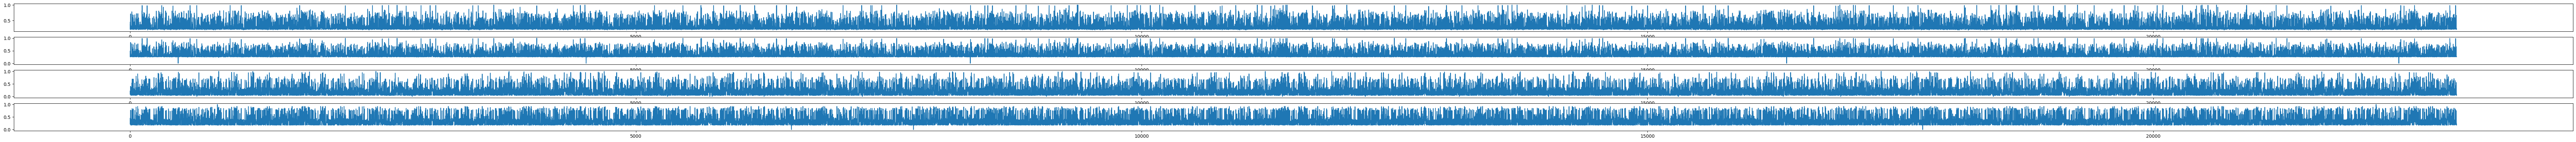

In [3]:
df_spline1 = df.iloc[:,5:6]
df_spline2 = df.iloc[:,6:7]
df_spline3 = df.iloc[:,8:9]
df_spline4 = df.iloc[:,11:12]

arrs = [df_spline1, df_spline2, df_spline3, df_spline4]
maxes = []
for i in range(len(arrs)):
    maxes.append(arrs[i].max())
for i in range(len(arrs)):
    arrs[i][arrs[i].columns[0]] /= maxes[i][0]

fig, axes = plt.subplots(height, 1, figsize=(100, 5))


for i in range(height):
    axes[i].plot(df.iloc[:,0:1], arrs[i])



    


        

In [4]:
x1 = arrs[0][arrs[0].columns[0]].values.reshape(1, -1)
x2 = arrs[1][arrs[1].columns[0]].values.reshape(1, -1)

print("SIM:", cosine_similarity(x1, x2))

SIM: [[0.99492424]]


In [12]:
df

,hankou,jiujiang,hukou,datong
0,21400.0,21700.0,4430.0,25200.0
1,10100.0,9910.0,4060.0,13500.0
2,17600.0,19400.0,5370.0,24800.0
3,10900.0,11500.0,1000.0,12500.0
4,18300.0,18100.0,8700.0,26300.0
...,...,...,...,...
22995,35700.0,38300.0,12000.0,52600.0
22996,15200.0,15800.0,7730.0,23900.0
22997,9620.0,9390.0,2870.0,11700.0
22998,11500.0,11800.0,826.0,12700.0


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# df = df.drop(columns=['cuntan', 'wulong', 'maoping', 'ThreeGRes', 'yichang', 'shashi', 'chenglingji', 'chenglingji7', 'DJKRes', 'DragonKT'], axis=1)
# df = df.iloc[:,1:]
df
reg = LinearRegression()
df_X = df.iloc[:,0:3]
df_Y = df.iloc[:,3:]
scores = cross_val_score(reg, df_X, df_Y, cv=10)
scores


array([0.987437  , 0.98320017, 0.97122051, 0.95804283, 0.95278659,
       0.94553499, 0.95118393, 0.96580144, 0.98056508, 0.98718698])